In [1]:
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
import time
import re
%matplotlib inline


# Web Scraping

#### Create the webscraping function
The function `get_data_from_cronometer` will be used get all the nutrtional information of the food. It requires that caller of the function must be on the website _cronomter.com_ and currently have the food added and be in grams. The `driver` parameter which is of type `selenium.webdriver` is the web browser where the data will be fetched from. The `serving_size` parameter will be a `string` type that will be specifiy the serving size such as `'1 cup'` or `'1 Tablespoon'` of the current food. The function returns a dictionary object with information about the food.

In [2]:
def get_data_from_cronometer(driver, serving_size=""):
    # must be logged in to cronometer
    # go to cronometer.com
    # yeborovatu@larjem.com
    
    result = {}
    
    result['Name'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[2]/table/tbody/tr[2]/td[2]/div').get_attribute('innerHTML')
    result['Serving Size'] = serving_size
    result['g'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[2]/table/tbody/tr[2]/td[3]/div').get_attribute('innerHTML')
    result['Calories'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[1]/table/tbody/tr[2]/td[2]/div').get_attribute('innerHTML')
    result['Carbohydrates (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[2]/table/tbody/tr[2]/td[2]/div').get_attribute('innerHTML')
    result['Fiber (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[2]/table/tbody/tr[3]/td[2]/div').get_attribute('innerHTML')
    result['Starch (g)'] = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[2]/table/tbody/tr[4]/td[2]/div').get_attribute('innerHTML')
    result['Sugars (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[2]/table/tbody/tr[5]/td[2]/div').get_attribute('innerHTML')
    result['Net Carbs (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[2]/table/tbody/tr[6]/td[2]/div').get_attribute('innerHTML')
    result['Fat (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[3]/table/tbody/tr[2]/td[2]/div').get_attribute('innerHTML')
    result['Monosaturated (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[3]/table/tbody/tr[3]/td[2]/div').get_attribute('innerHTML')
    result['Polyunsaturated (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[3]/table/tbody/tr[4]/td[2]/div').get_attribute('innerHTML')
    result['Omega-3 (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[3]/table/tbody/tr[5]/td[2]/div').get_attribute('innerHTML')
    result['Omega-6 (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[3]/table/tbody/tr[6]/td[2]/div').get_attribute('innerHTML')
    result['Saturated Fat (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[3]/table/tbody/tr[7]/td[2]/div').get_attribute('innerHTML')
    result['Trans-Fats (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[3]/table/tbody/tr[8]/td[2]/div').get_attribute('innerHTML')
    result['Cholesterol (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[3]/table/tbody/tr[9]/td[2]/div').get_attribute('innerHTML')
    result['Protein (g)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[1]/div[4]/table/tbody/tr[2]/td[2]/div').get_attribute('innerHTML')
    result['B1 (Thiamine) (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[2]/td[2]/div').get_attribute('innerHTML')
    result['B2 (Riboflavin) (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[3]/td[2]/div').get_attribute('innerHTML')
    result['B3 (Niacin) (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[4]/td[2]/div').get_attribute('innerHTML')
    result['B5 (Pantothentic Acid) (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[5]/td[2]/div').get_attribute('innerHTML')
    result['B6 (Pyridoxine) (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[6]/td[2]/div').get_attribute('innerHTML')
    result['B12 (Cobalamin) (ug)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[7]/td[2]/div').get_attribute('innerHTML')
    result['Folate (ug)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[8]/td[2]/div').get_attribute('innerHTML')
    result['Vitamin A (IU)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[9]/td[2]/div').get_attribute('innerHTML')
    result['Vitamin C (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[10]/td[2]/div').get_attribute('innerHTML')
    result['Vitamin D (IU)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[11]/td[2]/div').get_attribute('innerHTML')
    result['Vitamin E (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[12]/td[2]/div').get_attribute('innerHTML')
    result['Vitamin K (ug)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[1]/table/tbody/tr[13]/td[2]/div').get_attribute('innerHTML')
    result['Calcium (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[2]/td[2]/div').get_attribute('innerHTML')
    result['Copper (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[3]/td[2]/div').get_attribute('innerHTML')
    result['Iron (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[4]/td[2]/div').get_attribute('innerHTML')
    result['Magnesium (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[5]/td[2]/div').get_attribute('innerHTML')
    result['Manganese (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[6]/td[2]/div').get_attribute('innerHTML')
    result['Phosphorus (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[7]/td[2]/div').get_attribute('innerHTML')
    result['Potassium (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[8]/td[2]/div').get_attribute('innerHTML')
    result['Selenium (ug)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[9]/td[2]/div').get_attribute('innerHTML')
    result['Sodium (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[10]/td[2]/div').get_attribute('innerHTML')
    result['Zinc (mg)'] = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[5]/table/tbody/tr/td[2]/div[2]/table/tbody/tr[11]/td[2]/div').get_attribute('innerHTML')

    item = driver.find_element_by_xpath('//*[@id="cronometerApp"]/div[2]/div[1]/div/table/tbody/tr/td[2]/div/div[2]/table/tbody/tr[2]')
    # right click
    webdriver.ActionChains(driver).context_click(item).perform()
    time.sleep(0.5)
    
    delete_button = driver.find_element_by_css_selector('.delete-selected')
    delete_button.click()
    time.sleep(0.5)

    yes_button = driver.find_elements_by_css_selector('.popupContent tr button')[1]
    yes_button.click()    
    time.sleep(1)
    
    return result

#### Start up the web browser
We begin by first creating a webdriver which we will use Google Chrome Version 78 for Windows. If you have a different machine, visit https://chromedriver.chromium.org/ and download your version of Chrome for your specific machine. Then we must go to https://cronometer.com/ and log in. We must also initialize `result` to an empty array which will be used to save the information we scraped to a csv file.

In [3]:
# uncomment code
# driver = webdriver.Chrome('chromedriver/chromedriver.exe')
# result = []

#### Add food data
Then once we are on cronometer. We must add a food such as `Rice, Brown, Long-Grain, Cooked` and specify a serving such as `1 cup`. Once we add the food, we must change the serving to grams, and change the paramater `serving_size` in the function below to the string `1 cup` and then run the cell below. It will automatically be added to `result`

In [4]:
# result.append(get_data_from_cronometer(driver, serving_size='1 FDA Serving'))

Add the new foods to a csv file `foods_to_add.csv` which we can than add or override foods to `foods.csv` 

In [5]:
# foods_to_add = pd.DataFrame(result)
# foods_to_add.to_csv('foods_to_add.csv', index=False)

#### Read in the data
We then read in the information of the foods we've scraped from `foods.csv` and create a `pandas.DataFrame` object call `foods`. We also read in the Recommended Dietary Allowance (RDA) from 
>https://www.health.harvard.edu/staying-healthy/listing_of_vitamins

which will give us targets to hit for every vitamin and mineral.

In [6]:
foods = pd.read_csv('data/foods.csv')
rda = pd.read_csv('data/rda.csv')

#### Create more functions
`word_break` will be used the break up strings that are too long into multi-line strings. We will use this function when add axis labels to our charts to prevent long strings from taking up the majority of the width of the screen.

`bar_chart` will be used the find the top 10 foods the the highest amount of a specfic nutrient and then plot those foods on a bar chart as well as have a horizontal line showing where the minimum rda value lies. `foods` will be a `pandas.DataFrame` object, `col` will be a specfic col in `foods` of which we are trying the top 10 of that column. `rda` will be a `float` value of minimum rda neccessary. 

`plot_nutrition` will be used the plot a bar chart of all the minerals and vitamins of a food as a percentage against the minium rda and will also plot a chart of the fat, carbohydrate, and protein breakdown in a pie chart. `nutrition` will a dictionary object.

In [7]:
def word_break(names, max_len):
    new_names = []
    for name in names:
        new_name = []
        temp = ''
        for word in name.split(' '):
            if len(temp) + len(word) > max_len:
                new_name.append(temp + '\n')
                temp = word
            else:
                if len(temp) > 0:
                    temp += ' '
                temp += word
        if len(temp) > 0:
            new_name.append(temp)
        new_names.append(' '.join(new_name))
    return new_names


def bar_chart(foods, rda, col):
    unit = col[col.rfind('(') + 1:col.rfind(')')]

    top_10 = foods.sort_values(by=col, ascending=False).head(10)
    top_10.sort_values(by=col, inplace=True)

    top_10.drop(top_10[top_10[col] == 0].index, inplace=True)

    top_10.drop(top_10.columns.difference(['Name', 'g', col]),
                axis=1,
                inplace=True)

    top_10["Name"] = top_10["Name"].map(str) + ' (' + top_10["g"].astype(
        np.int64).map(str) + 'g)'
    top_10['Name'] = word_break(top_10['Name'].tolist(), 30)
    top_10.drop(columns="g", inplace=True)

    fig, ax = plt.subplots()

    top_10.plot(kind='barh',
                ax=ax,
                width=0.7,
                fontsize=15,
                x='Name',
                figsize=(5, 10),
                title='Top 10 Foods With Highest ' + col)
    if rda:
        plt.axvline(color='#000000',
                    x=rda,
                    linestyle='--',
                    label='Recommended Dietary\nAllowance (' + str(rda) + ' ' +
                    unit + ')')
    plt.legend(loc='lower right')
    plt.margins(0.5)
    ax.title.set_size(20)
    ax.set_ylabel(None)
    ax.set_xlabel(unit, fontsize=15)
    fig.autofmt_xdate()
    # add labels with amount next to bar
    for i, v in enumerate(top_10[col]):
        ax.text(x=v, y=i, s=str(v))


def plot_nutrition(nutrition):
    nutrition_df = pd.DataFrame([nutrition])
    percent_df = nutrition_df.drop(
        columns=['Calories', 'Fat (g)', 'Carbohydrates (g)', 'Protein (g)'])
    percent_df = percent_df.divide(rda) * 100
    percent_df = percent_df.T[::-1]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.5)
    fig.set_size_inches(18.5, 10.5)

    ax1.axvline(color='#000000',
                x=100,
                linestyle='--',
                label='100%')
        
    percent_df.plot(kind='barh', ax=ax1, width=0.7, fontsize=15)
    ax1.get_legend().remove()
    ax1.set_xlabel("Percent", fontsize=15)
    # add labels with amount next to bar
    for i, v in enumerate(list(percent_df[0])):
        ax1.text(x=v,
                 y=i,
                 s=str(int(v)) + '%',
                 fontsize=15)

    calories = nutrition_df['Calories'][0]
    fat = nutrition_df['Fat (g)'][0]
    carbs = nutrition_df['Carbohydrates (g)'][0]
    protein = nutrition_df['Protein (g)'][0]

    ax2.pie(
        [fat * 9, carbs * 4, protein * 4],
        labels=[
            str(int(fat)) + 'g Fat ' + ' (' + str(int(fat) * 9) + ' Calories)',
            str(int(carbs)) + 'g Carbohydrates ' + ' (' + str(int(carbs) * 4) +
            ' Calories)',
            str(int(protein)) + 'g Protein ' + ' (' + str(int(protein) * 4) +
            ' Calories)'
        ],
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 15})
    ax2.set_title(str(int(calories)) + ' Calorie Breakdown')
    ax2.title.set_size(20)

# What vegan foods provide necessary vitamins a person needs?
We will show that there is a vegan food that can provide every kind of vitamin.

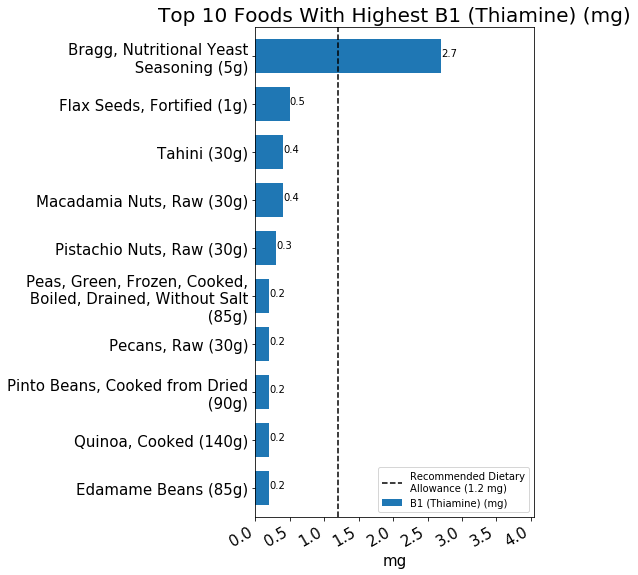

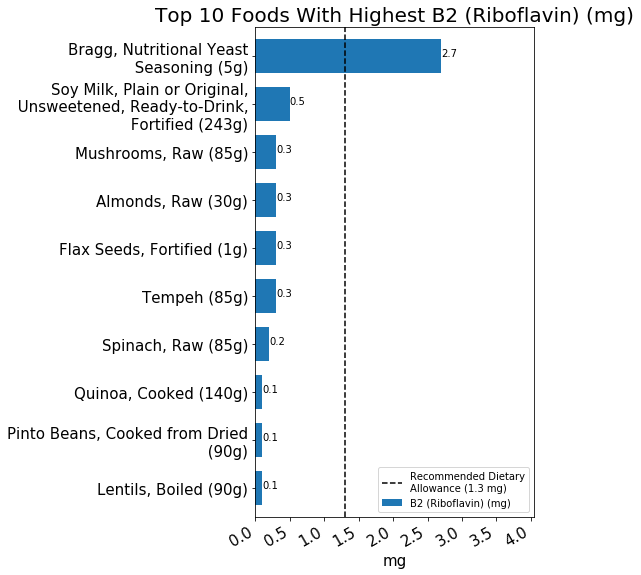

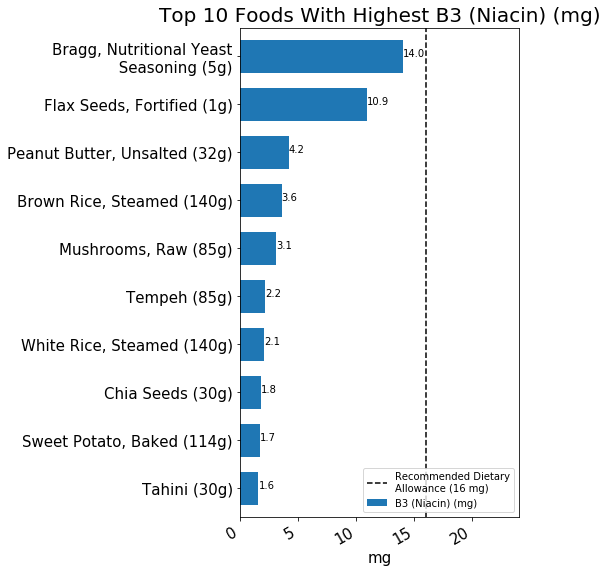

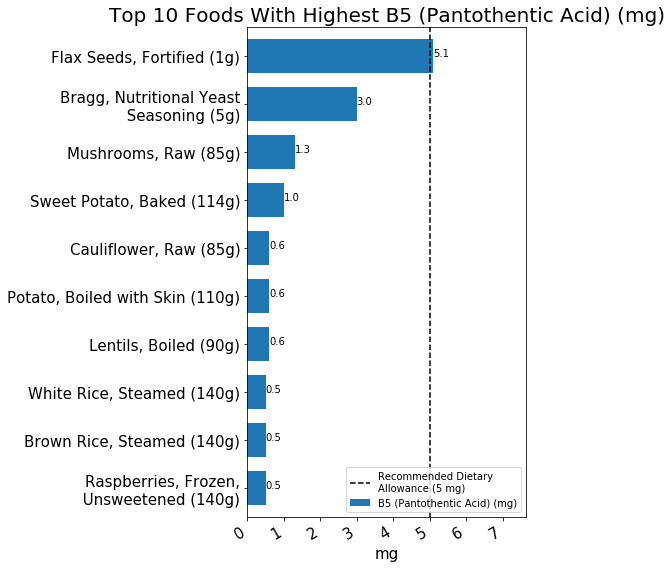

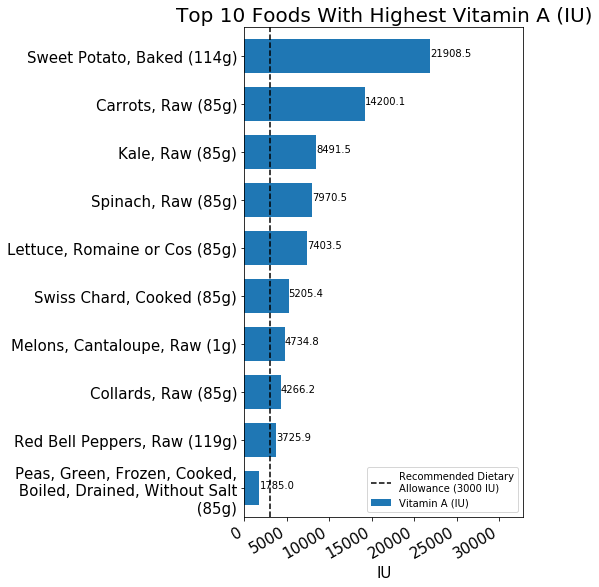

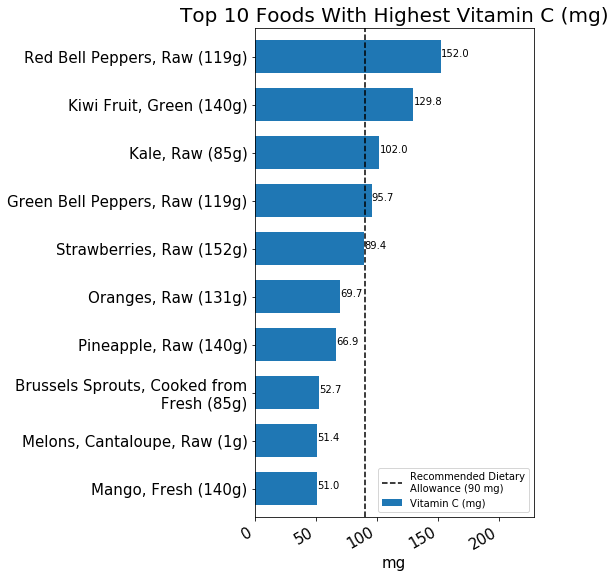

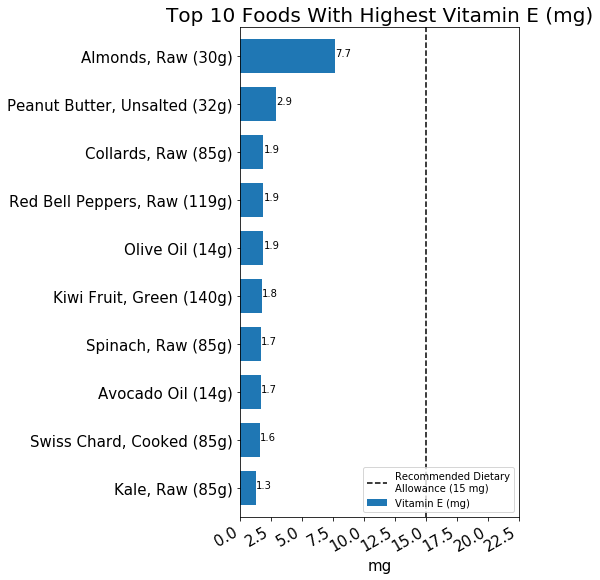

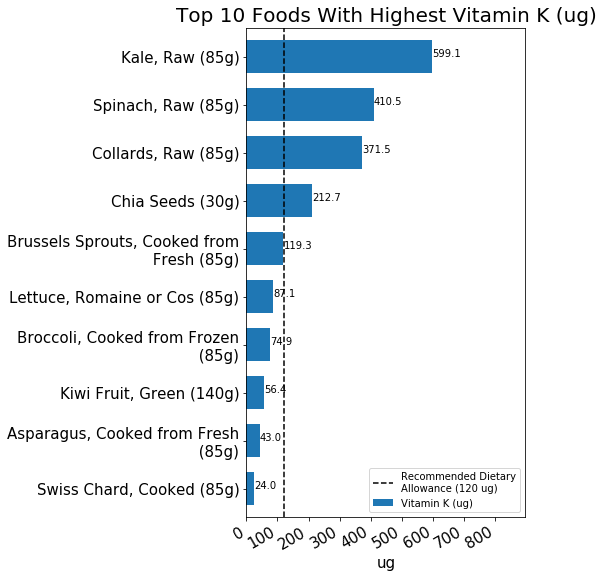

In [8]:
vitamins = [
    'B1 (Thiamine) (mg)', 'B2 (Riboflavin) (mg)', 'B3 (Niacin) (mg)',
    'B5 (Pantothentic Acid) (mg)', 'B6 (Pyridoxine) (mg)', 'Folate (ug)',
    'Vitamin A (IU)', 'Vitamin C (mg)', 'Vitamin E (mg)', 'Vitamin K (ug)'
]
for col in vitamins:
    bar_chart(foods, rda[col][0], col)

# What vegan foods provide necessary minerals a person needs?
We will show that there is a vegan food that can provide every kind of mineral.

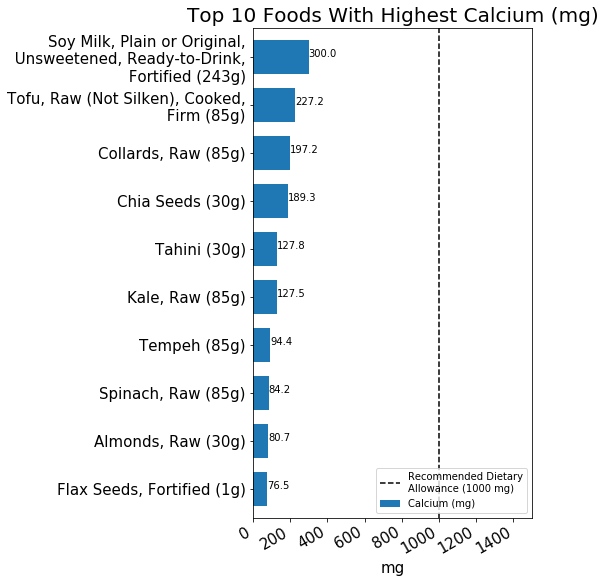

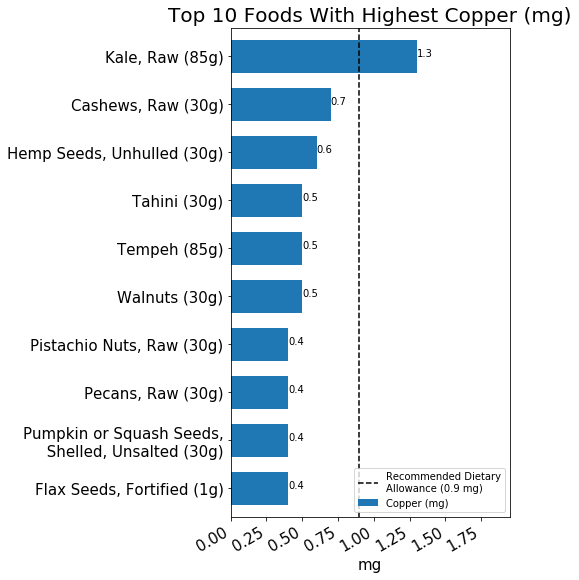

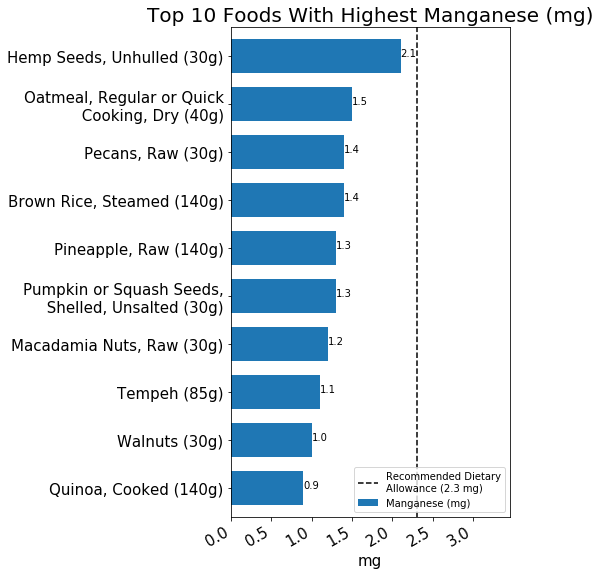

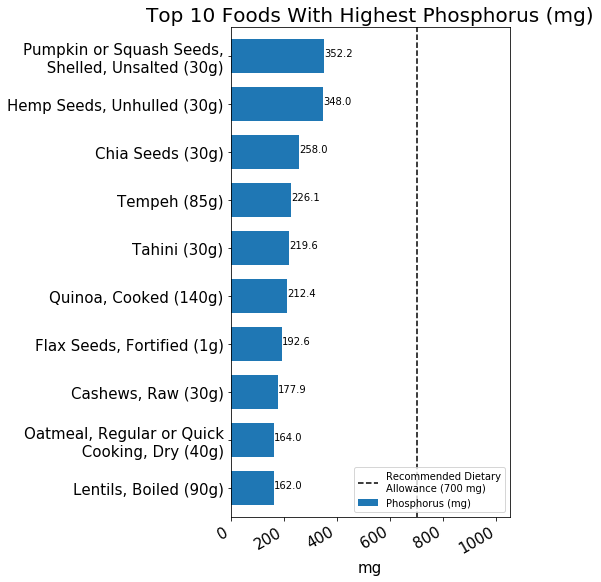

In [9]:
minerals = [
    'Calcium (mg)', 'Copper (mg)', 'Iron (mg)', 'Magnesium (mg)',
    'Manganese (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Selenium (ug)',
    'Zinc (mg)'
]
for col in minerals:
    bar_chart(foods, rda[col][0], col)

Text(0.5, 0, 'Percent')

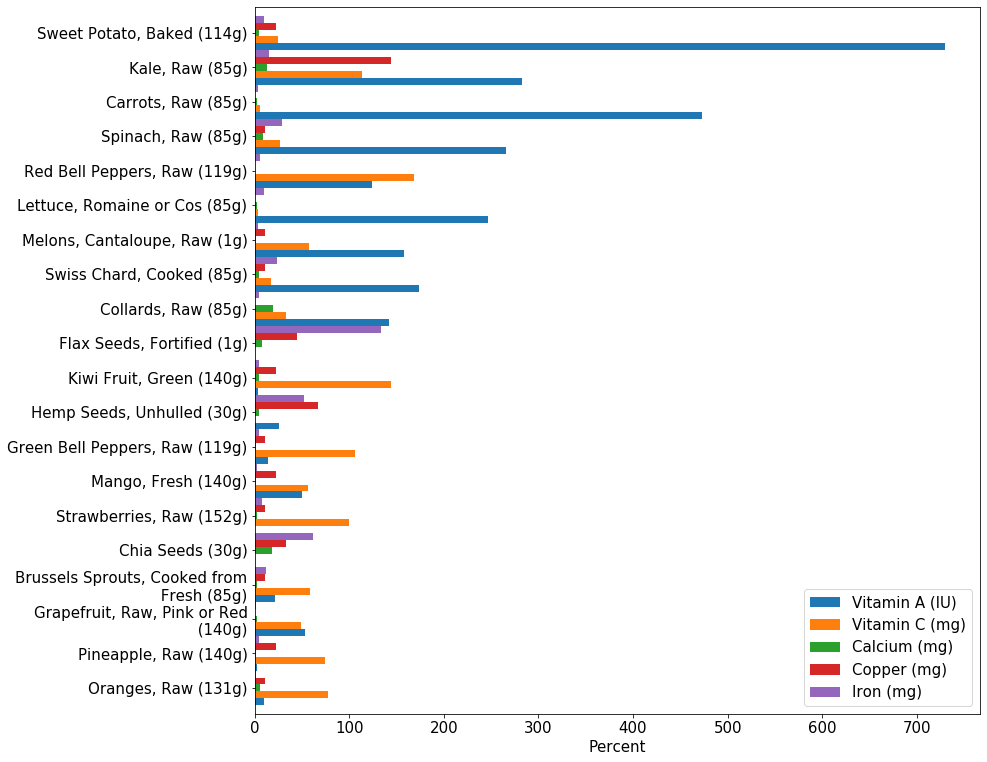

In [10]:
# cols = vitamins + minerals
cols = [
    'Vitamin A (IU)', 'Vitamin C (mg)', 'Calcium (mg)', 'Copper (mg)',
    'Iron (mg)'
]

top_20 = foods.copy()
top_20['Total Percent'] = 0.0
for col in cols:
    top_20['Total Percent'] += foods[col] / rda[col][0]
    top_20[col] = foods[col] / rda[col][0] * 100

top_20 = top_20.sort_values(by='Total Percent', ascending=False).head(20)
top_20.sort_values(by='Total Percent', ascending=True, inplace=True)

top_20.set_index('Name')
top_20["Name"] = top_20["Name"].map(str) + ' (' + top_20["g"].astype(
    np.int64).map(str) + 'g)'
top_20['Name'] = word_break(top_20['Name'].tolist(), 30)

top_20.drop(top_20.columns.difference(cols + ['Name']), 1, inplace=True)

fig, ax = plt.subplots()
top_20.plot(kind='barh', ax=ax, x='Name', figsize=(13, 13), fontsize=15, width=1)
plt.legend(prop={'size': 15})
ax.set_ylabel(None)
ax.set_xlabel("Percent", fontsize=15)

# What vegan foods provide necessary  fat, protein, carbohydrates, fiber a person needs?
We will show which foods are the highest in  fat, protein, carbohydrates, fiber.

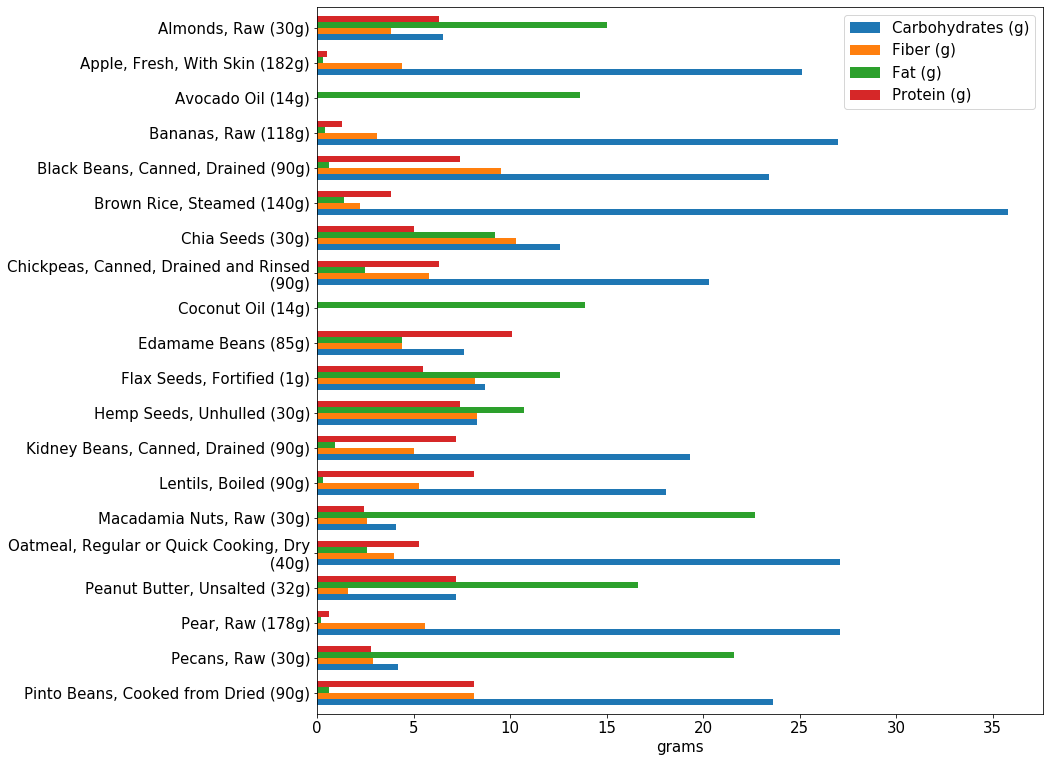

In [11]:
top_10_fat = foods.sort_values(by='Fat (g)', ascending=False).head(10)
top_10_protein = foods.sort_values(by='Protein (g)', ascending=False).head(10)
top_10_carbs = foods.sort_values(by='Carbohydrates (g)',
                                 ascending=False).head(10)
top_10_fiber = foods.sort_values(by='Fiber (g)', ascending=False).head(10)
temp = [top_10_fat, top_10_protein, top_10_carbs, top_10_fiber]
high_cal_foods = pd.concat(temp)
high_cal_foods.drop_duplicates(inplace=True)

high_cal_foods = high_cal_foods.sort_values(by='Name', ascending=True).head(20)
high_cal_foods.set_index('Name')

high_cal_foods["Name"] = high_cal_foods["Name"].map(
    str) + ' (' + high_cal_foods["g"].astype(np.int64).map(str) + 'g)'
high_cal_foods['Name'] = word_break(high_cal_foods['Name'].tolist(), 40)

high_cal_foods.drop(high_cal_foods.columns.difference(
    ['Fat (g)', 'Protein (g)', 'Carbohydrates (g)', 'Fiber (g)', 'Name']),
                    1,
                    inplace=True)
high_cal_foods.sort_values(by='Name', ascending=False, inplace=True)
fig, ax = plt.subplots()
high_cal_foods.plot(kind='barh',
                    ax=ax,
                    x='Name',
                    figsize=(13, 13),
                    width=0.7,
                    fontsize=15)
plt.legend(prop={'size': 15})
ax.set_ylabel(None)
ax.set_xlabel('grams', fontsize=15)
None

# What specific vegan foods or meals can a person eat to get necessary vitamins and minerals?
We will create 3 different sets of meals a person can eat in day to get the necessary vitamins and minerals they need.
#### Note
`Sodium` is used as an upper limit so a person should try to be below 100% (2300mg)
Some meal plans are not 100% for `Vitamin D (IU)` and `B12 (Cobalamin) (ug)`. `Vitamin D (IU)` is a vitamin that can be obtained from the sun, a supplement, or fortified foods. `B12 (Cobalamin) (ug)` is a vitamin that can be obtained from a supplement, or fortified foods.

#### Create necessary functions
We'll start by creating the neccessary functions which will be used to get the nutrtional data.

`get_nutrition` will take in `food_item` which will be a dictionary where the keys are food and the values are the amount of that food. It'll return the nutrition as dictionary with keys as vitamins/minerals and the values as the amount. 

`get_nutrition_from_list` is the same except it takes in a list.

In [12]:
nutrition_cols = list(rda.columns)
nutrition_cols.extend(
    ['Calories', 'Fat (g)', 'Carbohydrates (g)', 'Protein (g)'])


def get_nutrition(food_item):
    nutrition = dict.fromkeys(list(nutrition_cols), 0)
    for key, value in food_item.items():
        food = foods.loc[foods['Name'] == key]
        for col in nutrition_cols:
            nutrition[col] += value * food.iloc[0][col].astype(float)
    return nutrition


def get_nutrition_from_list(food_items):
    total_nutrition = dict.fromkeys(list(nutrition_cols), 0)
    for d in map(get_nutrition, food_items):
        for key, value in d.items():
            total_nutrition[key] += value
    return total_nutrition

# Meal Plan 1
### Meal 1 Blueberry Oatmeal
    Oatmeal, Regular or Quick Cooking, Dry: 2 Servings (80 grams)
    Soy Milk, Plain or Original, Unsweetened, Ready-to-Drink, Fortified: 1 Cup (243 grams)
    Raspberries, Frozen, Unsweetened: 1 Serving (140 grams)
    Chia Seeds: 3 tbsp (30 grams)
    Flax Seeds, Fortified: 1/2 Serving (30 grams)
### Meal 2 Rice And Tempeh
    White Rice, Steamed: 2 Servings (280 grams)
    Black Beans, Canned, Drained: 2 Serving (180 grams)
    Tempeh: 2 Servings (170 grams)
    Avocado, Black Skin, California Type: 1/2 Avocado (60 grams)
### Meal 3 Potato With Swiss Chard
    Potato, Boiled with Skin: 2 servings (220 grams)
    Swiss Chard, Cooked: 1 Serving (85 grams)
### Snacks
    Bananas, Raw: 1 medium - 7" to 7 7/8" long (118 grams)
    Almonds, Raw: 2 Servings (60 grams)

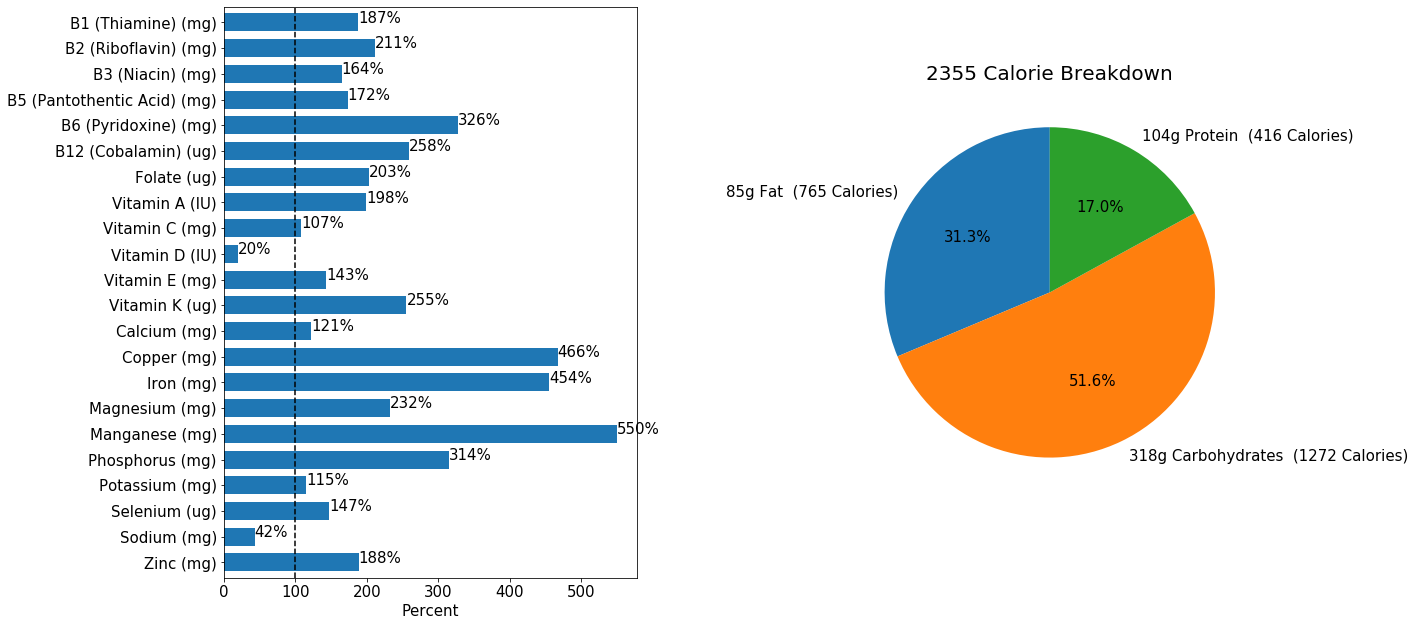

In [13]:
oatmeal = {
    'Oatmeal, Regular or Quick Cooking, Dry': 2,
    'Soy Milk, Plain or Original, Unsweetened, Ready-to-Drink, Fortified': 1,
    'Raspberries, Frozen, Unsweetened': 1,
    'Chia Seeds': 1,
    'Flax Seeds, Fortified': 0.5
}
rice_tempeh = {
    'White Rice, Steamed': 2,
    'Black Beans, Canned, Drained': 2,
    'Tempeh': 2,
    'Avocado, Black Skin, California Type': 2
}
potato_chard = {'Potato, Boiled with Skin': 2, 'Swiss Chard, Cooked': 1}
snacks_1 = {'Bananas, Raw': 1, 'Almonds, Raw': 2}

day_1_nutrition = get_nutrition_from_list(
    [oatmeal, rice_tempeh, potato_chard, snacks_1])
plot_nutrition(day_1_nutrition)


# Meal Plan 2
### Meal 1 Smoothie
    Dates, Medjool: 4 dates, pitted (96 grams)
    Hemp Seeds, Unhulled: 6 tbsp (60 grams)
    Collards, Raw: 2 Servings (170 grams)
    Kale, Raw: 1 Serving (80 grams)
    Blueberries, Frozen, Unsweetened: 1 Serving (140 grams)
### Meal 2 Rice And Tofu
    White Rice, Steamed: 2 Servings (280 grams)
    Tofu, Raw (Not Silken), Cooked, Firm: 2 Servings (170 grams)
    Black Beans, Canned, Drained: 2 Serving (180 grams)
    Lettuce, Romaine or Cos: 1 Serving (85 grams)
### Meal 3 Lentils
    Lentils, Boiled: 3 Servings (270 grams)
    Bragg, Nutritional Yeast Seasoning: 1 tbsp (5 grams)
### Snacks
    Broccoli, Cooked from Frozen: 1 Serving (85 grams)
    Almonds, Raw: 1 Serving (30 grams)

In [14]:
smoothie = {
    'Dates, Medjool': 4,
    'Hemp Seeds, Unhulled': 2,
    'Collards, Raw': 2,
    'Kale, Raw': 1,
    'Blueberries, Frozen, Unsweetened': 1
}
rice_tofu = {
    'White Rice, Steamed': 2,
    'Tofu, Raw (Not Silken), Cooked, Firm': 2,
    'Black Beans, Canned, Drained': 2,
    'Lettuce, Romaine or Cos': 1
}
lentils_yeast = {
    'Lentils, Boiled': 3,
    'Bragg, Nutritional Yeast Seasoning': 1
}
snacks_2 = {'Broccoli, Cooked from Frozen': 1, 'Almonds, Raw': 1}

day_2_nutrition = get_nutrition_from_list(
    [smoothie, rice_tofu, lentils_yeast, snacks_2])
plot_nutrition(day_2_nutrition)


# Meal Plan 3
### Meal 1 Quinoa And Tofu
    Quinoa, Cooked: 2 Servings (280 grams)
    Tofu, Raw (Not Silken), Cooked, Firm: 2 Servings (170 grams)
    Black Beans, Canned, Drained: 2 Servings (180 grams)
    Avocado, Black Skin, California Type: 2 Servings (60 grams)
    Tomato, Red, Raw: 2 medium slice - 1/4" thick (40 grams)
    Onion, White, Yellow or Red, Raw: 1 serving (80 grams)
### Meal 2 Sweet Potato With Banana And Peanut Butter
    Sweet Potato, Baked: 2 medium - 2" diameter x 5 (228 grams)
    Bananas, Raw: 1 medium - 7" to 7 7/8" long (118 grams)
    Peanut Butter, Unsalted: 2 tbsp (32 grams)
### Meal 3 Rice With Chickpeas And Spinach
    Brown Rice, Steamed: 1.5 Servings (210 grams)
    Chickpeas, Canned, Drained and Rinsed: 1 Serving (140 grams)
    Spinach, Raw: 1/4 bunch (85 grams)
### Snacks
    Almonds, Raw: 2 Servings (60 grams)
    Oranges, Raw: 1 medium - 2 5/8" diameter (131 grams)

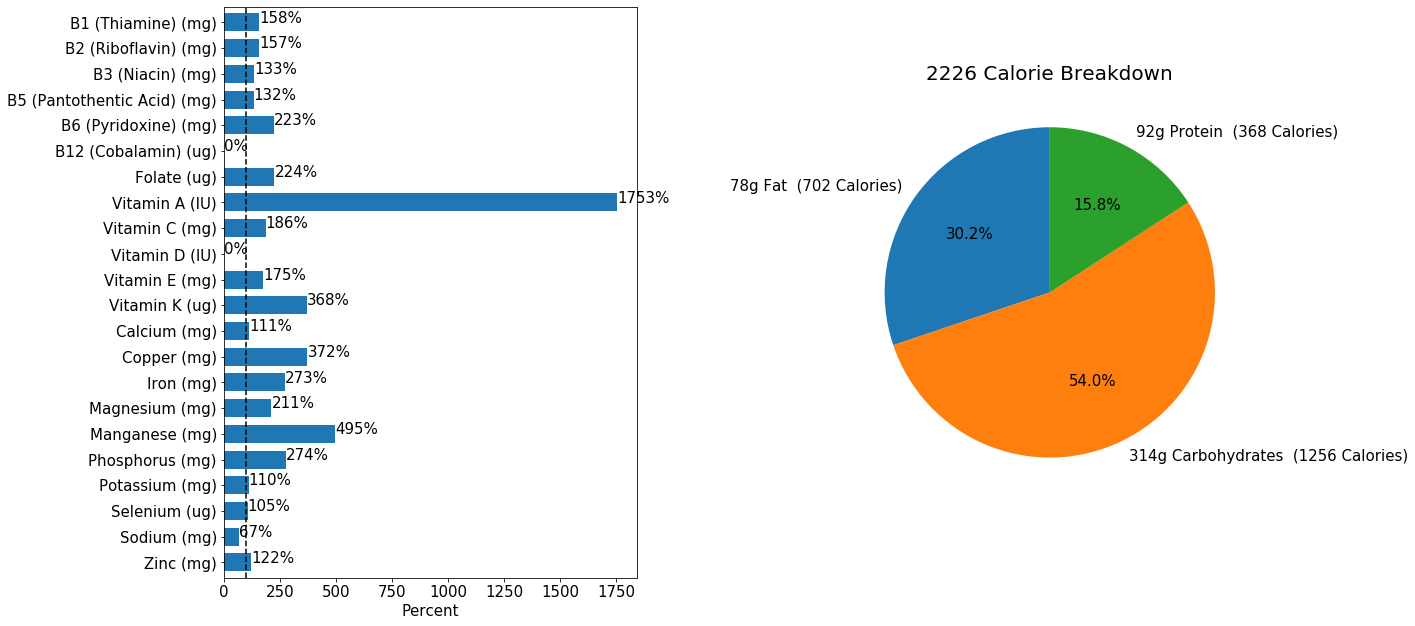

In [15]:
quinoa_tofu = {
    'Quinoa, Cooked': 2,
    'Tofu, Raw (Not Silken), Cooked, Firm': 2,
    'Black Beans, Canned, Drained': 2,
    'Avocado, Black Skin, California Type': 2,
    'Tomato, Red, Raw': 1,
    'Onion, White, Yellow or Red, Raw': 1
}
potato_banana_peanut = {
    'Sweet Potato, Baked': 2,
    'Bananas, Raw': 1,
    'Peanut Butter, Unsalted': 1
}
rice_chickpeas = {
    'Brown Rice, Steamed': 1.5,
    'Chickpeas, Canned, Drained and Rinsed': 1,
    'Spinach, Raw': 1
}
snacks_3 = {'Almonds, Raw': 2, 'Oranges, Raw': 1}

day_3_nutrition = get_nutrition_from_list(
    [quinoa_tofu, potato_banana_peanut, rice_chickpeas, snacks_3])
plot_nutrition(day_3_nutrition)

# Average for all 3 Meal Plans

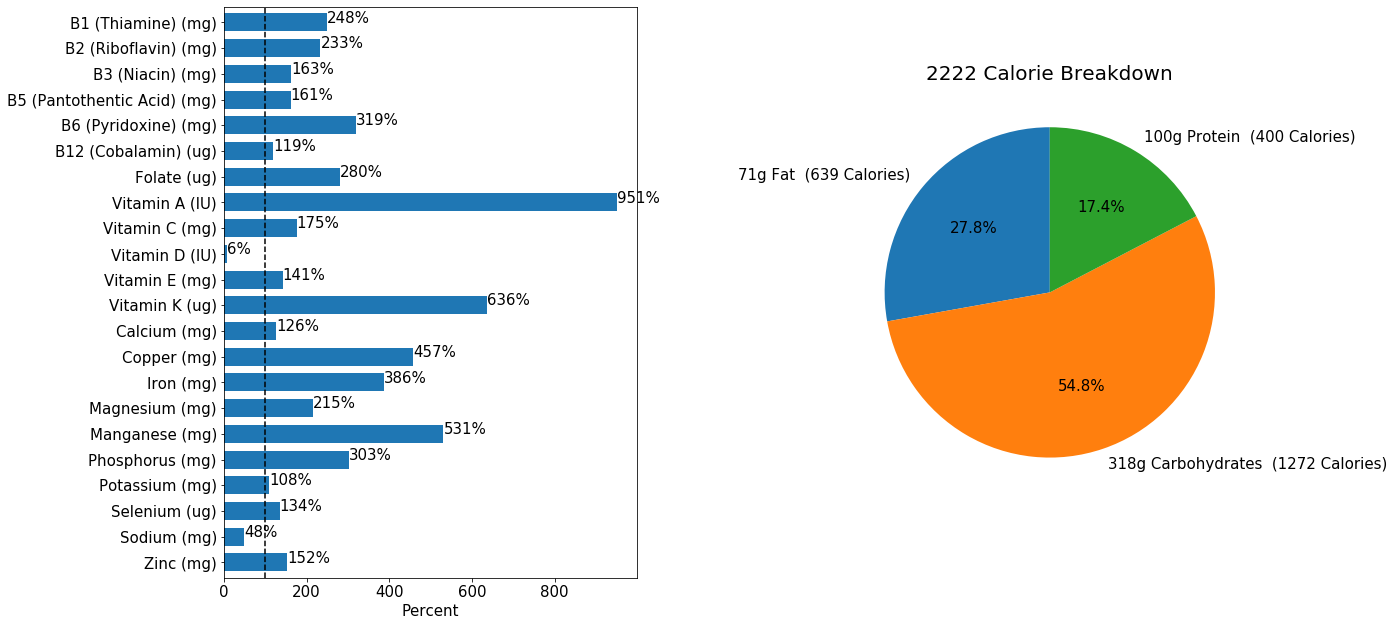

In [16]:
total_nutrition = day_1_nutrition
for key in total_nutrition:
    total_nutrition[key] = (total_nutrition[key] + day_2_nutrition[key] + day_3_nutrition[key]) / 3
plot_nutrition(total_nutrition)